In [114]:
import cv2 as cv2
import glob
import os
import matplotlib.pyplot as plt
import copy
import numpy as np

In [115]:
#kernel = np.ones((5,5),np.float32)/25
blank_image = cv2.imread("training_images/1585434750_438314676_Left.png")
#blank_image = cv2.filter2D(blank_image,-1,kernel)
#blackbox_image = cv2.imread("training_images/black_box.png")
blackbox_image = cv2.imread("training_images/purple_cup.png")
#cup_image = cv2.filter2D(cup_image,-1,kernel)
blank_image = cv2.cvtColor(blank_image, cv2.COLOR_BGR2RGB)
blackbox_image = cv2.cvtColor(blackbox_image, cv2.COLOR_BGR2RGB)
org_image = copy.deepcopy(blackbox_image)
blackbox_image_gray = cv2.cvtColor(blackbox_image, cv2.COLOR_BGR2GRAY)

In [116]:
#image = cv2.absdiff(blackbox_image, blank_image)
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)



#ret,thresh1 = cv2.threshold(gray,1,255,cv2.THRESH_BINARY)
#plt.imshow(gray, cmap='gray')

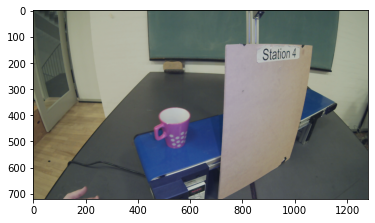

In [117]:
#im_show = cv2.cvtColor(cup_image, cv2.COLOR_HSV2RGB)
plt.imshow(blackbox_image)

In [118]:
kernel = np.ones((7,7),np.uint8)


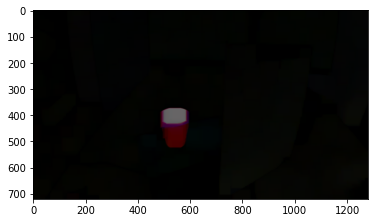

In [119]:
diff = copy.copy(blackbox_image)
for i in range(0,0):
    blackbox_image = cv2.GaussianBlur(blackbox_image,(5,5),0)
    blank_image = cv2.GaussianBlur(blank_image,(5,5),0)
cv2.absdiff(blackbox_image, blank_image, diff)
diff_gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
for i in range(0, 3):
    dilated = cv2.dilate(diff_gray.copy(), None, iterations= i+ 1)

#_,thresh1 = cv2.threshold(diff_gray,0,255,cv2.THRESH_BINARY)
#plt.imshow(thresh1)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(diff,kernel,iterations = 10)
dilation = cv2.dilate(erosion,kernel,iterations = 10)
#opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)
plt.imshow(dilation)

In [120]:
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(dilation)

for i in range(num_labels):
    #32000
    if(stats[i][4] < 40000 and stats[i][4] > 7000):
        cv2.rectangle(org_image, (stats[i][0], stats[i][1]), (stats[i][0] + stats[i][2], stats[i][1] + stats[i][3]), (0, 255, 0), 2)

plt.imshow(org_image)

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\connectedcomponents.cpp:5623: error: (-215:Assertion failed) L.channels() == 1 && I.channels() == 1 in function 'cv::connectedComponents_sub1'
